In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.06G/1.06G [00:10<00:00, 109MB/s]
100% 1.06G/1.06G [00:10<00:00, 113MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
#generators -create batches
keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

# Create training dataset
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

# Create validation dataset
validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)


Found 20000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [8]:
# Define the process function
def process(image, label):
    image = tf.cast(image / 255., tf.float32)
    return image, label

# Assuming you have train_ds and validation_ds defined earlier...

# Apply the process function to the datasets
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [9]:
#creating CNN model

from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [15]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 67s 103ms/step - loss: 0.1221 - accuracy: 0.9541 - val_loss: 1.4826 - val_accuracy: 0.7202
Epoch 2/10
625/625 [==============================] - 69s 109ms/step - loss: 0.1122 - accuracy: 0.9597 - val_loss: 0.6283 - val_accuracy: 0.7904
Epoch 3/10
625/625 [==============================] - 69s 109ms/step - loss: 0.0777 - accuracy: 0.9703 - val_loss: 1.2067 - val_accuracy: 0.7700
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.0651 - accuracy: 0.9739 - val_loss: 2.9985 - val_accuracy: 0.7046
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.0556 - accuracy: 0.9772 - val_loss: 0.8224 - val_accuracy: 0.8250
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.0523 - accuracy: 0.9797 - val_loss: 0.5489 - val_accuracy: 0.8058
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.0580 - accuracy: 0.9776 - val_loss: 0.9382 - val_ac

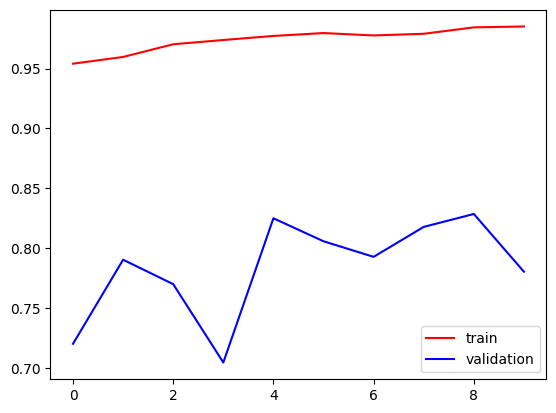

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

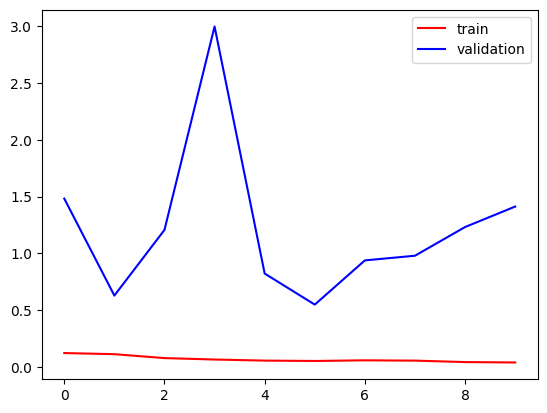

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [18]:
#need to reduce complexity

#add more data
#reducing complexity

In [19]:
import cv2

In [50]:
test_image = cv2.imread('/content/Screenshot.jpg')

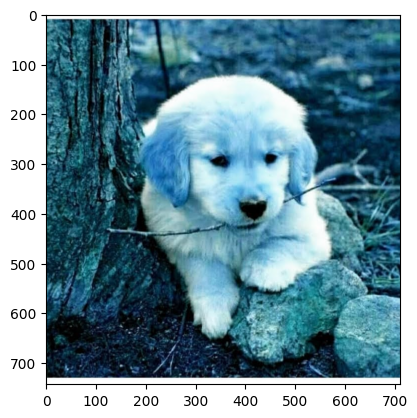

In [51]:
plt.imshow(test_image)

In [52]:
test_image.shape

(743, 711, 3)

In [53]:
test_image = cv2.resize(test_image,(256,256))

In [54]:
test_input = test_image.reshape(1,256,256,3)

In [55]:
model.predict(test_input)

1/1 [==============================] - 0s 33ms/step


array([[1.]], dtype=float32)